<a href="https://colab.research.google.com/github/Deekshitmanisai/Deekshit-s-DataBase/blob/main/LDA_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                           confusion_matrix, classification_report)


Step 1: Preparing Data
Training data shape: (124, 13)
Test data shape: (54, 13)

Step 2: Model Training

Step 3: Evaluating Models

LDA Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


Logistic Regression Performance:
Accuracy: 0.9815
Precision: 0.9827
Recall: 0.9815
F1-Score: 0.9816

Confusion Matrix:
[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


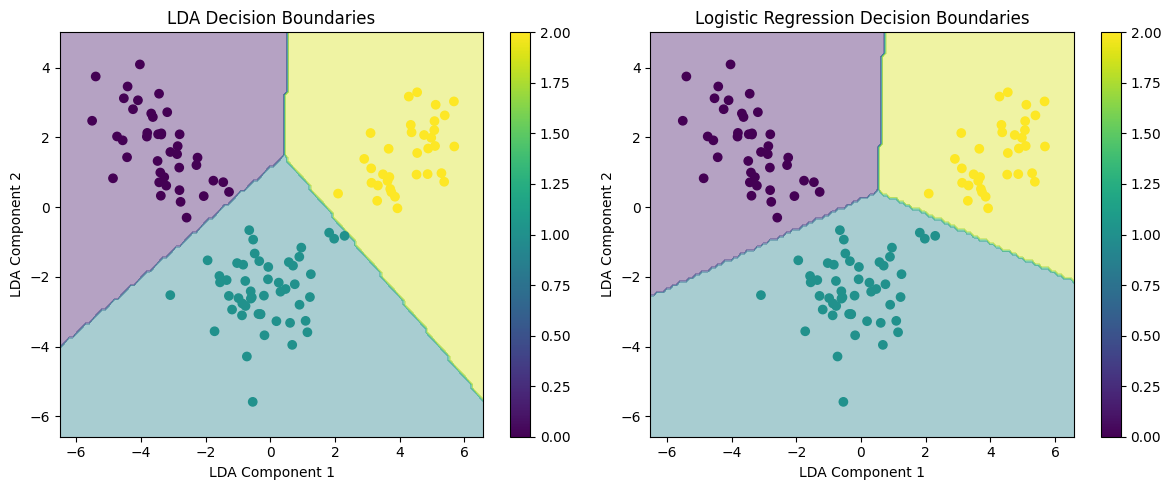


Step 5: Model Comparison Summary
Comparison Summary:
1. Performance Comparison:
   - LDA Accuracy: 1.0000
   - Logistic Regression Accuracy: 0.9815

2. Computational Assumptions:
   - LDA assumes normality with equal class covariances.
   - Logistic Regression does not assume data distribution.

3. Interpretability:
   - LDA interprets features via discriminants.
   - Logistic Regression provides coefficients for feature importance.


In [28]:
def lda_vs_logistic_classification():
    # Step 1: Preparing the Data
    print("Step 1: Preparing Data")
    # Load wine dataset
    data = load_wine()
    features, target = data.data, data.target

    # Splitting into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.3, random_state=42
    )

    # Standardizing the features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    print("Training data shape:", X_train_std.shape)
    print("Test data shape:", X_test_std.shape)

    # Step 2: Training Models
    print("\nStep 2: Model Training")
    # Fit Linear Discriminant Analysis
    lda_model = LinearDiscriminantAnalysis()
    lda_model.fit(X_train_std, y_train)

    # Fit Logistic Regression
    log_reg_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    log_reg_model.fit(X_train_std, y_train)

    # Step 3: Evaluating Models
    def evaluate(model, X, y_true, model_name):
        y_pred = model.predict(X)
        accuracy = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average='weighted'
        )
        conf_matrix = confusion_matrix(y_true, y_pred)

        print(f"\n{model_name} Performance:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        print("\nConfusion Matrix:")
        print(conf_matrix)
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))

        return conf_matrix, accuracy, precision, recall, f1

    print("\nStep 3: Evaluating Models")
    lda_results = evaluate(lda_model, X_test_std, y_test, "LDA")
    log_reg_results = evaluate(log_reg_model, X_test_std, y_test, "Logistic Regression")

    # Step 4: Visualizing Decision Boundaries
    def plot_boundaries(X, y, models, names):
        lda_for_viz = LinearDiscriminantAnalysis(n_components=2)
        X_2d = lda_for_viz.fit_transform(X, y)

        x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
        y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        plt.figure(figsize=(12, 5))

        for idx, (model, name) in enumerate(zip(models, names)):
            plt.subplot(1, 2, idx + 1)

            # Fit model on 2D-transformed data
            model_2d = model.__class__()
            model_2d.fit(X_2d, y)

            # Plot decision regions
            Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=0.4)

            # Plot actual data points
            scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis')
            plt.colorbar(scatter)

            plt.title(f'{name} Decision Boundaries')
            plt.xlabel('LDA Component 1')
            plt.ylabel('LDA Component 2')

        plt.tight_layout()
        plt.show()

    print("\nStep 4: Visualizing Decision Boundaries")
    plot_boundaries(X_train_std, y_train, [lda_model, log_reg_model], ["LDA", "Logistic Regression"])

    # Step 5: Summary and Comparison
    print("\nStep 5: Model Comparison Summary")
    print("Comparison Summary:")
    print("1. Performance Comparison:")
    print(f"   - LDA Accuracy: {lda_results[1]:.4f}")
    print(f"   - Logistic Regression Accuracy: {log_reg_results[1]:.4f}")
    print("\n2. Computational Assumptions:")
    print("   - LDA assumes normality with equal class covariances.")
    print("   - Logistic Regression does not assume data distribution.")
    print("\n3. Interpretability:")
    print("   - LDA interprets features via discriminants.")
    print("   - Logistic Regression provides coefficients for feature importance.")

if __name__ == "__main__":
    lda_vs_logistic_classification()